In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [99]:
df = pd.read_csv('spotify_data.csv')

In [100]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [101]:
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [103]:
train, test = train_test_split(df, test_size = 0.15)

In [104]:
train.shape,test.shape

((1714, 17), (303, 17))

In [105]:
like_tempo = df[df['target'] == 1]['tempo']
dislike_tempo = df[df['target'] == 0]['tempo']
like_dance = df[df['target'] == 1]['danceability']
dislike_dance = df[df['target'] == 0]['danceability']
like_duration = df[df['target'] == 1]['duration_ms']
dislike_duration = df[df['target'] == 0]['duration_ms']
like_loudness = df[df['target'] == 1]['loudness']
dislike_loudness = df[df['target'] == 0]['loudness']
like_speechiness  = df[df['target'] == 1]['speechiness']
dislike_speechiness  = df[df['target'] == 0]['speechiness']
like_valence = df[df['target'] == 1]['valence']
dislike_valence = df[df['target'] == 0]['valence']
like_energy = df[df['target'] == 1]['energy']
dislike_energy = df[df['target'] == 0]['energy']
like_key = df[df['target'] == 1]['key']
dislike_key = df[df['target'] == 0]['key']
like_acousticness = df[df['target'] == 1]['acousticness']
dislike_acousticness = df[df['target'] == 0]['acousticness']
like_instrumentalness = df[df['target'] == 1]['instrumentalness']
dislike_instrumentalness = df[df['target'] == 0]['instrumentalness']

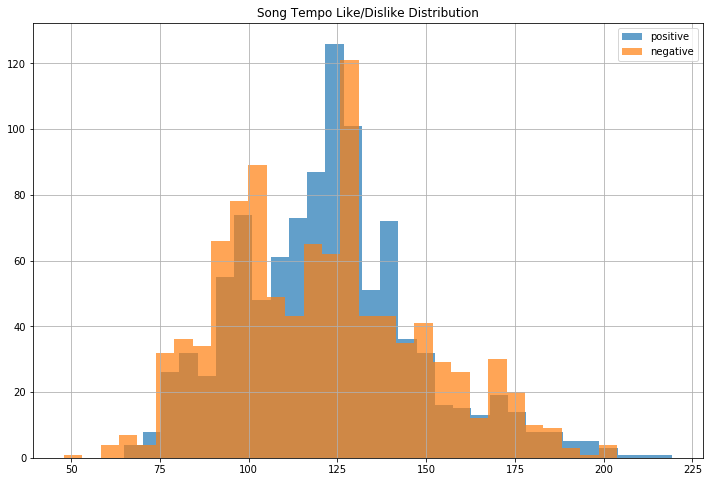

In [106]:
fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like/Dislike Distribution")
like_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
dislike_tempo.hist(alpha = 0.7, bins = 30, label = 'negative')
plt.legend(loc = "upper right")

/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes

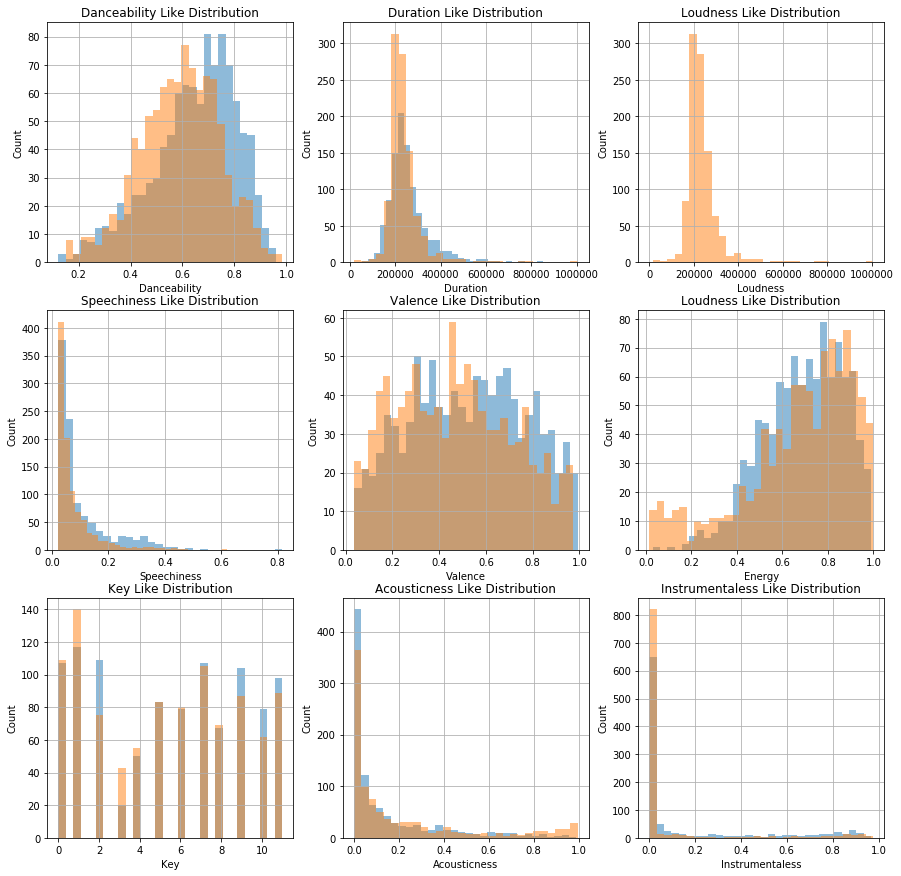

In [107]:
fig2 = plt.figure(figsize = (15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Danceability Like Distribution')
like_dance.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
dislike_dance.hist(alpha = 0.5, bins = 30)

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Duration Like Distribution')
like_duration.hist(alpha = 0.5, bins = 30)
ax6 = fig2.add_subplot(332)
dislike_duration.hist(alpha = 0.5, bins = 30)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Loudness Like Distribution')
like_loudness.hist(alpha = 0.5, bins = 30)
ax8 = fig2.add_subplot(333)
dislike_duration.hist(alpha = 0.5, bins = 30)

#Speechiness
ax8 = fig2.add_subplot(334)
ax8.set_xlabel('Speechiness')
ax8.set_ylabel('Count')
ax8.set_title('Speechiness Like Distribution')
like_speechiness.hist(alpha = 0.5, bins = 30)
ax9 = fig2.add_subplot(334)
dislike_speechiness.hist(alpha = 0.5, bins = 30)

#Valence
ax10 = fig2.add_subplot(335)
ax10.set_xlabel('Valence')
ax10.set_ylabel('Count')
ax10.set_title('Valence Like Distribution')
like_valence.hist(alpha = 0.5, bins = 30)
ax11 = fig2.add_subplot(335)
dislike_valence.hist(alpha = 0.5, bins = 30)

#Energy
ax12 = fig2.add_subplot(336)
ax12.set_xlabel('Energy')
ax12.set_ylabel('Count')
ax12.set_title('Loudness Like Distribution')
like_energy.hist(alpha = 0.5, bins = 30)
ax13 = fig2.add_subplot(336)
dislike_energy.hist(alpha = 0.5, bins = 30)

#Key
ax14 = fig2.add_subplot(337)
ax14.set_xlabel('Key')
ax14.set_ylabel('Count')
ax14.set_title('Key Like Distribution')
like_key.hist(alpha = 0.5, bins = 30)
ax15 = fig2.add_subplot(337)
dislike_key.hist(alpha = 0.5, bins = 30)

#Acousticness
ax16 = fig2.add_subplot(338)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title('Acousticness Like Distribution')
like_acousticness.hist(alpha = 0.5, bins = 30)
ax17 = fig2.add_subplot(338)
dislike_acousticness.hist(alpha = 0.5, bins = 30)

#Instrumentaless
ax18 = fig2.add_subplot(339)
ax18.set_xlabel('Instrumentaless')
ax18.set_ylabel('Count')
ax18.set_title('Instrumentaless Like Distribution')
like_instrumentalness.hist(alpha = 0.5, bins = 30)
ax19 = fig2.add_subplot(339)
dislike_instrumentalness.hist(alpha = 0.5, bins = 30)

In [108]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [109]:
features = ["danceability","loudness","valence","energy", "instrumentalness","key","speechiness","acousticness","duration_ms"]

In [110]:
X_train = train[features]
Y_train = train["target"]

X_test = test[features]
Y_test = test["target"]

In [111]:
dt = c.fit(X_train,Y_train)

In [112]:
y_pred = c.predict(X_test)

In [113]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [114]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,y_pred) * 100

In [115]:
print("Accuracy using Decision Tree ", round(score, 1), "%")

Accuracy using Decision Tree  65.7 %
